In [22]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from keras.layers import Dense, Dropout, BatchNormalization
from sklearn.utils import resample


In [5]:
# Load the data from CSV file
df = pd.read_csv("/Users/someshsahu/Downloads/bankruptcy.csv")
# df.head()

# Check for NaN Values
nan_rows = df[df.isna().any(axis=1)]
if len(nan_rows) > 0:
    print(nan_rows)
else:
    print("No NaN values found.")

No NaN values found.


### We will split the data into two different groups. The first dataframe will contain all 95 variables while the second dataframe will contain the top 10 variables with the highest correlation to bankruptcy. 

The cell below is for all variables

In [12]:
# Split the data into training and testing sets for all variables
X = df.drop("Bankrupt?", axis=1)
y = df["Bankrupt?"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

y.value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

In [13]:
# Separate majority and minority classes
df_majority = df[df["Bankrupt?"] == 0]
df_minority = df[df["Bankrupt?"] == 1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=42)  # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled["Bankrupt?"].value_counts()
X_upsample = df_upsampled.drop("Bankrupt?", axis=1)
y_upsample = df_upsampled["Bankrupt?"]

X_train_upsample, X_test_upsample, y_train_upsample, y_test_upsample = train_test_split(X_upsample, y_upsample, test_size=0.2,random_state=42)



The cell below is for the top 10 variables

In [14]:
# Split the data into training and testing sets for top 10 variables based on correlation with bankruptcy

corr_matrix = df.corr()
num_features = 10
corr_with_bankrupt = corr_matrix["Bankrupt?"].abs().sort_values(ascending=False)
top_corr_features = corr_with_bankrupt[1:num_features+1].index.tolist()
df_top10 = df[top_corr_features]
X_top10 = df_top10
y_top10 = df["Bankrupt?"]
X_train_top10, X_test_top10, y_train_top10, y_test_top10 = train_test_split(X_top10, y_top10, test_size=0.2,random_state=42)

### Building a Neural Network Model

This code creates a neural network model using the Keras library with two layers. The first layer is a fully connected (Dense) layer with 64 neurons, which takes an input of shape X_train.shape[1] (the number of features in the training data) and uses the ReLU activation function. The second layer is another Dense layer with a single neuron and uses the sigmoid activation function, which is commonly used for binary classification problems.

In summary, the model has an input layer with the same number of neurons as the number of features in the data, one hidden layer with 64 neurons, and an output layer with a single neuron that outputs a probability between 0 and 1 representing the likelihood of the input belonging to the positive class (bankruptcy in this case).

In [15]:
# Build the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Differnt model (testing optimization)

model2 = Sequential()
model2.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model2.add(BatchNormalization())
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))



model_top10 = Sequential()
model_top10.add(Dense(64, input_dim=X_train_top10.shape[1], activation='relu'))
model_top10.add(Dense(32, activation='relu'))
model_top10.add(Dense(32, activation='relu'))
model_top10.add(Dense(32, activation='relu'))
model_top10.add(Dense(32, activation='relu'))
model_top10.add(Dense(1, activation='sigmoid'))

# model for upsampled data (All)

model_upsample_all = Sequential()
model_upsample_all.add(Dense(128, input_dim=X_train_upsample.shape[1], activation='relu'))
model_upsample_all.add(BatchNormalization())
model_upsample_all.add(Dense(64, activation='relu'))
model_upsample_all.add(Dropout(0.2))
model_upsample_all.add(Dense(32, activation='relu'))
model_upsample_all.add(Dense(1, activation='sigmoid'))

model.compile is a function in Keras that compiles the model with the chosen loss function, optimizer, and metrics. In this case, the loss function chosen is binary_crossentropy, which is commonly used for binary classification problems. The optimizer chosen is adam, which is a commonly used optimization algorithm for neural networks. Finally, metrics is set to accuracy, which will be used to evaluate the performance of the model during training and testing.

In [16]:
# Compile the model for all variables
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Compile the model for top 10 variables
model_top10.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# compile the model for all variables with upsampled dataset

model_upsample_all.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


#### This line of code trains the neural network model on the training data with the following parameters:

X_train and y_train: the input features and corresponding target variable used for training the model.
epochs=50: the number of times the model is trained on the entire training dataset.
batch_size=32: the number of samples that will be used in each batch of training.
validation_data=(X_test, y_test): the validation data on which the model will be evaluated after each epoch of training. The validation data is used to monitor the performance of the model on data that it has not seen during training.
During training, the model tries to minimize the binary cross-entropy loss function using the Adam optimizer. The accuracy metric is also computed during training to evaluate the performance of the model on the training data.

In [17]:
# Train the model for all variables
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

model2.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Train the model for top 10 variables

model_top10.fit(X_train_top10, y_train_top10, epochs=50, batch_size=32, validation_data=(X_test_top10, y_test_top10))

# Traint the model for all the variables with the upsampled dataset

model_upsample_all.fit(X_train_upsample, y_train_upsample, epochs=50, batch_size=32, validation_data=(X_test_upsample, y_test_upsample))


Epoch 1/50
171/171 [==============================] - 2s 3ms/step - loss: 3350064.7500 - accuracy: 0.9382 - val_loss: 1223003.2500 - val_accuracy: 0.9062
Epoch 2/50
171/171 [==============================] - 0s 1ms/step - loss: 1043737.8750 - accuracy: 0.9470 - val_loss: 1263930.5000 - val_accuracy: 0.9604
Epoch 3/50
171/171 [==============================] - 0s 1ms/step - loss: 636503.8125 - accuracy: 0.9474 - val_loss: 938307.0000 - val_accuracy: 0.9597
Epoch 4/50
171/171 [==============================] - 0s 2ms/step - loss: 565812.6250 - accuracy: 0.9467 - val_loss: 980450.4375 - val_accuracy: 0.9611
Epoch 5/50
171/171 [==============================] - 0s 1ms/step - loss: 435563.1875 - accuracy: 0.9435 - val_loss: 627290.9375 - val_accuracy: 0.9589
Epoch 6/50
171/171 [==============================] - 0s 2ms/step - loss: 320246.6250 - accuracy: 0.9452 - val_loss: 367856.5312 - val_accuracy: 0.9553
Epoch 7/50
171/171 [==============================] - 0s 1ms/step - loss: 269295.000

### Seeing the accuracy of our NN model(s)

In [19]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)

# Print the accuracy
print("Accuracy for dataset with all variables:", accuracy)

loss2, accuracy2 = model2.evaluate(X_test, y_test)

print("Accuracy for dataset with all variables using optimized NN:", accuracy2)


loss_top10, accuracy_top10 = model_top10.evaluate(X_test_top10, y_test_top10)

print("Accuracy for dataset with top 10 variables:", accuracy_top10)

#Accuracy for upsampled dataset and optimised model
loss_upsample_all, accuracy_upsample_all = model_upsample_all.evaluate(X_test_upsample, y_test_upsample)

print("Accuracy for upsampled dataset with all variables:", accuracy_upsample_all)

43/43 [==============================] - 0s 1ms/step - loss: 8703.5771 - accuracy: 0.9626
Accuracy for dataset with all variables: 0.9626099467277527
43/43 [==============================] - 0s 2ms/step - loss: 0.1707 - accuracy: 0.9545
Accuracy for dataset with all variables using optimized NN: 0.9545454382896423
43/43 [==============================] - 0s 946us/step - loss: 0.1001 - accuracy: 0.9655
Accuracy for dataset with top 10 variables: 0.9655424952507019
83/83 [==============================] - 0s 909us/step - loss: 0.1234 - accuracy: 0.9587
Accuracy for upsampled dataset with all variables: 0.958712100982666


### Trying to do some visualisation of the data here


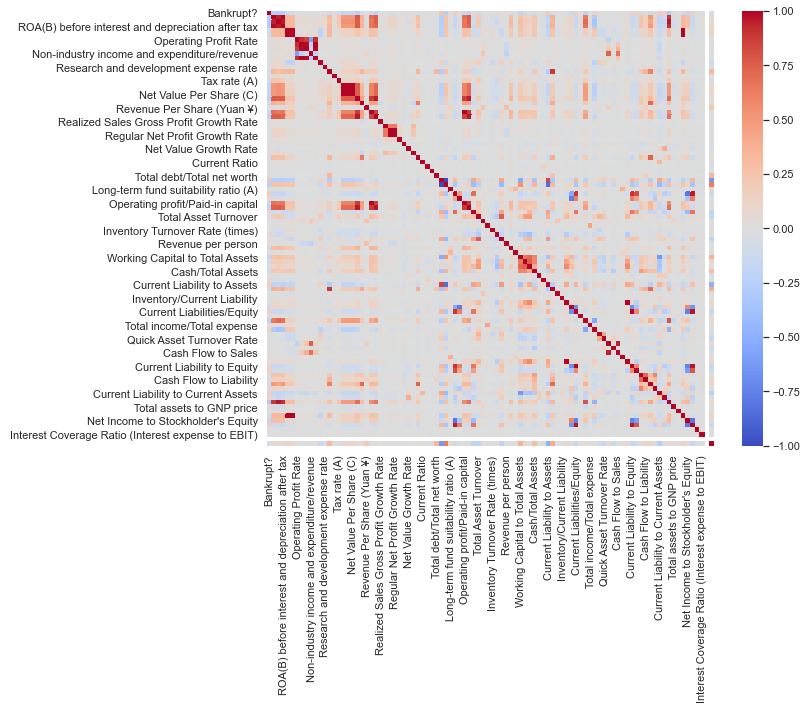

In [68]:
# Create a correlation matrix
corr_matrix = df.corr()

# Generate a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm')

# Show the plot
plt.show()

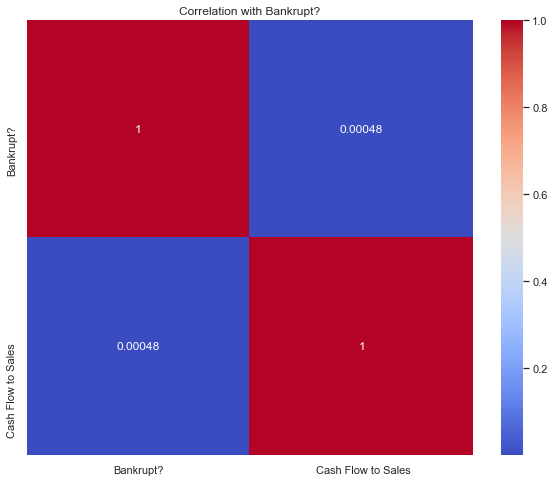

In [69]:
#print(df.columns.to_list)

bankrupt_df = df[['Bankrupt?', ' Cash Flow to Sales']]
bankrupt_corr_matrix = bankrupt_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(bankrupt_corr_matrix, cmap='coolwarm', annot = True)
plt.title('Correlation with Bankrupt?')
plt.show()




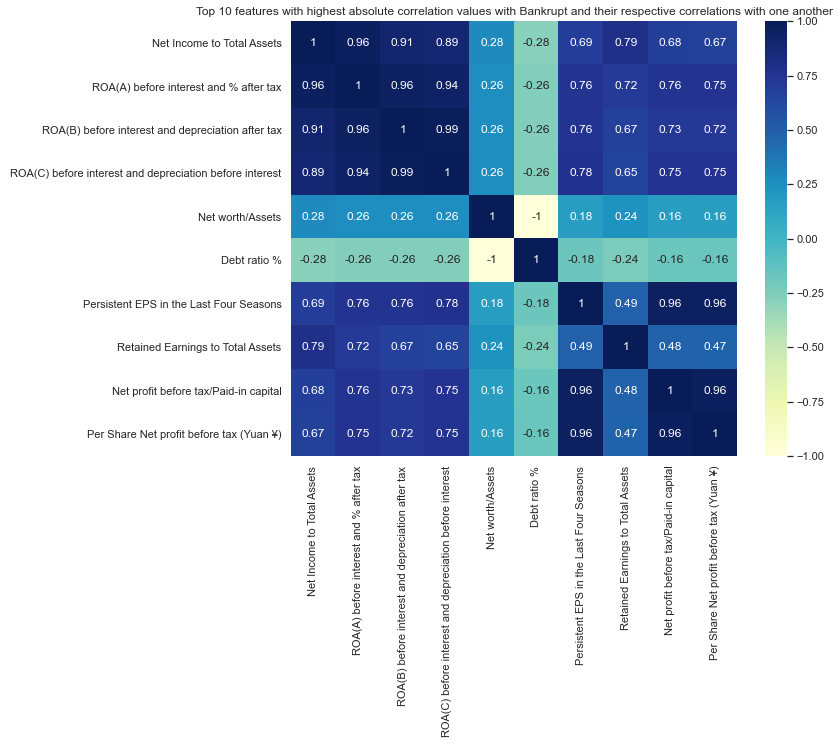

In [70]:
# Find the top 10 features with highest absolute correlation values with Bankrupt? column
num_features = 10
corr_with_bankrupt = corr_matrix["Bankrupt?"].abs().sort_values(ascending=False)
top_corr_features = corr_with_bankrupt[1:num_features+1].index.tolist()

# Create a heatmap of top 10 features with highest absolute correlation values
sns.set(style="white")
plt.figure(figsize=(10,8))
sns.heatmap(df[top_corr_features].corr(), annot=True, cmap="YlGnBu")
plt.title("Top 10 features with highest absolute correlation values with Bankrupt and their respective correlations with one another", fontsize=12)
plt.show()

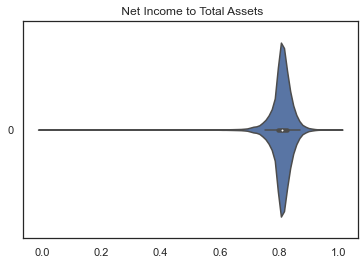

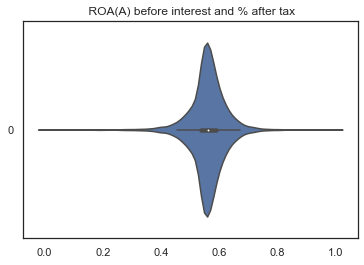

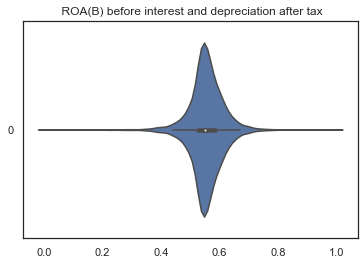

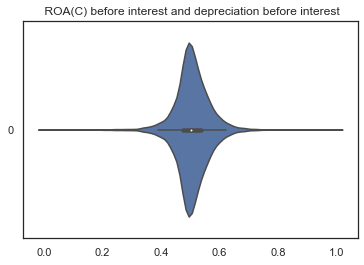

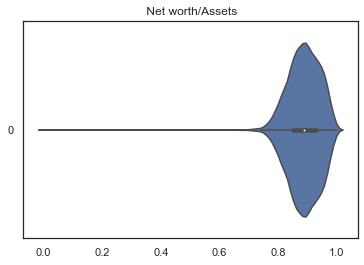

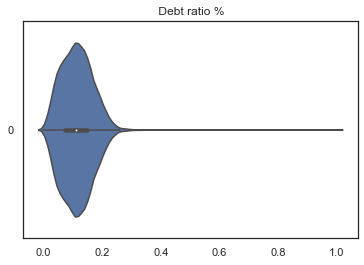

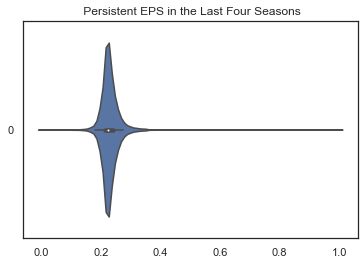

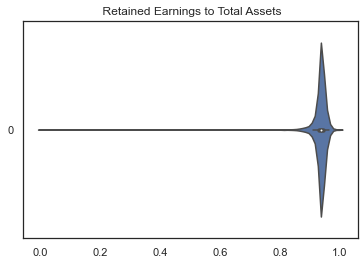

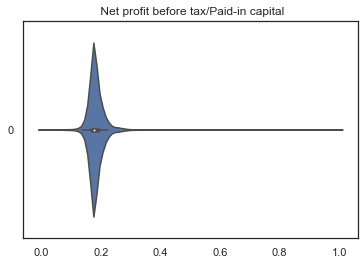

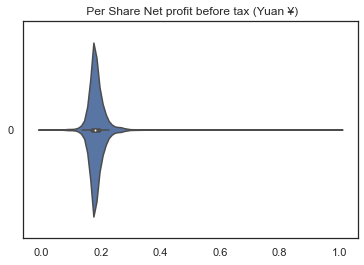

In [71]:
for feature in top_corr_features:
    sns.violinplot(data=df[feature], orient = "h")
    plt.title(feature)
    plt.show()

Number of Outliers for Net Income to Total Assets: 561


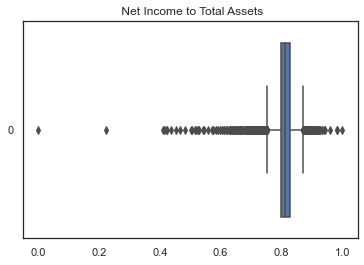

Number of Outliers for ROA(A) before interest and % after tax: 561


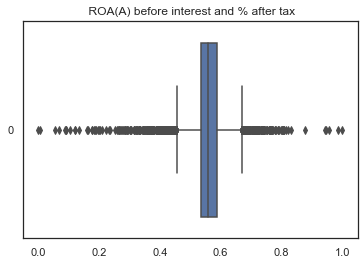

Number of Outliers for ROA(B) before interest and depreciation after tax: 432


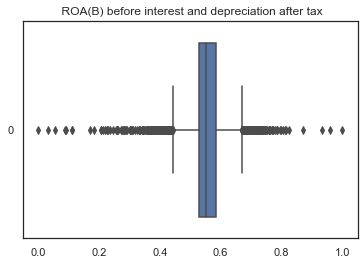

Number of Outliers for ROA(C) before interest and depreciation before interest: 391


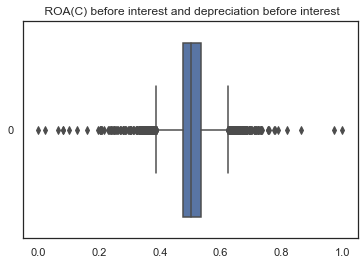

Number of Outliers for Net worth/Assets: 30


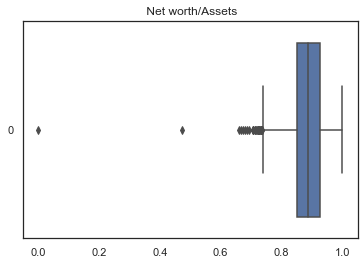

Number of Outliers for Debt ratio %: 30


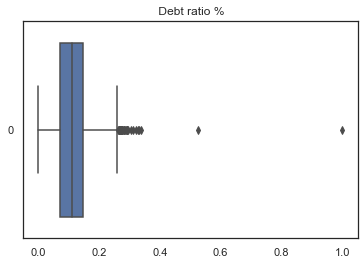

Number of Outliers for Persistent EPS in the Last Four Seasons: 508


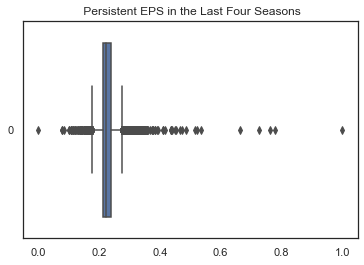

Number of Outliers for Retained Earnings to Total Assets: 633


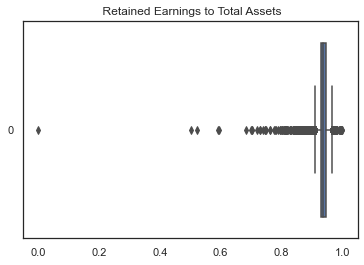

Number of Outliers for Net profit before tax/Paid-in capital: 476


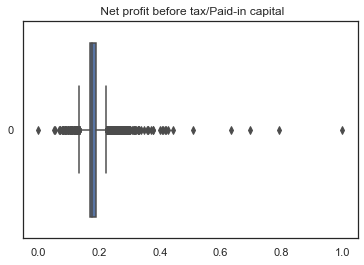

Number of Outliers for Per Share Net profit before tax (Yuan ¥): 511


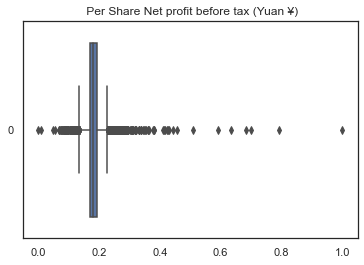

In [72]:
for feature in top_corr_features:
    sns.boxplot(data = df[feature], orient = "h")
    plt.title(feature)
    q1, q3 = df[feature].quantile([0.25, 0.75])
    iqr = q3 - q1

    # Identify the lower and upper bounds
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)

    # Count the number of outliers
    outliers = len(df[(df[feature] < lower_bound) | (df[feature] > upper_bound)])

    print(f"Number of Outliers for{feature}:", outliers)

    plt.show()

In [73]:
# Create scatter plot for each combination of top features
# for i in range(len(top_corr_features)):
#     for j in range(i+1, len(top_corr_features)):
#         feature1 = top_corr_features[i]
#         feature2 = top_corr_features[j]
#         sns.jointplot(x=feature1, y=feature2, data=df, kind='reg')
#         plt.show()

### Building a Decision Tree Model

This code trains a decision tree classifier model dectree with a maximum depth of 2 on the training data X_train and y_train.

After training, the model is visualized as a tree using the plot_tree function from sklearn.tree. The plot_tree function generates a tree diagram that shows the decision-making process of the decision tree model.

The filled=True argument fills the tree nodes with colors to indicate the class distribution, while the rounded=True argument makes the edges of the boxes around the nodes rounded.

The feature_names argument specifies the names of the input features or predictors, which are columns in the DataFrame X.

The class_names argument specifies the names of the target classes or outputs, which in this case are "Not Bankrupt" and "Bankrupt".

The resulting tree diagram can be used to interpret how the model makes predictions for new data based on the values of the input features.

[Text(669.6, 1087.2, " Net Income to Stockholder's Equity <= 0.834\ngini = 0.06\nsamples = 5455\nvalue = [5286, 169]\nclass = Not Bankrupt"),
 Text(334.8, 652.32, ' Interest Expense Ratio <= 0.63\ngini = 0.463\nsamples = 192\nvalue = [122, 70]\nclass = Not Bankrupt'),
 Text(167.4, 217.44000000000005, 'gini = 0.465\nsamples = 49\nvalue = [18, 31]\nclass = Bankrupt'),
 Text(502.20000000000005, 217.44000000000005, 'gini = 0.397\nsamples = 143\nvalue = [104, 39]\nclass = Not Bankrupt'),
 Text(1004.4000000000001, 652.32, ' Borrowing dependency <= 0.379\ngini = 0.037\nsamples = 5263\nvalue = [5164, 99]\nclass = Not Bankrupt'),
 Text(837.0, 217.44000000000005, 'gini = 0.012\nsamples = 4626\nvalue = [4597, 29]\nclass = Not Bankrupt'),
 Text(1171.8, 217.44000000000005, 'gini = 0.196\nsamples = 637\nvalue = [567, 70]\nclass = Not Bankrupt')]

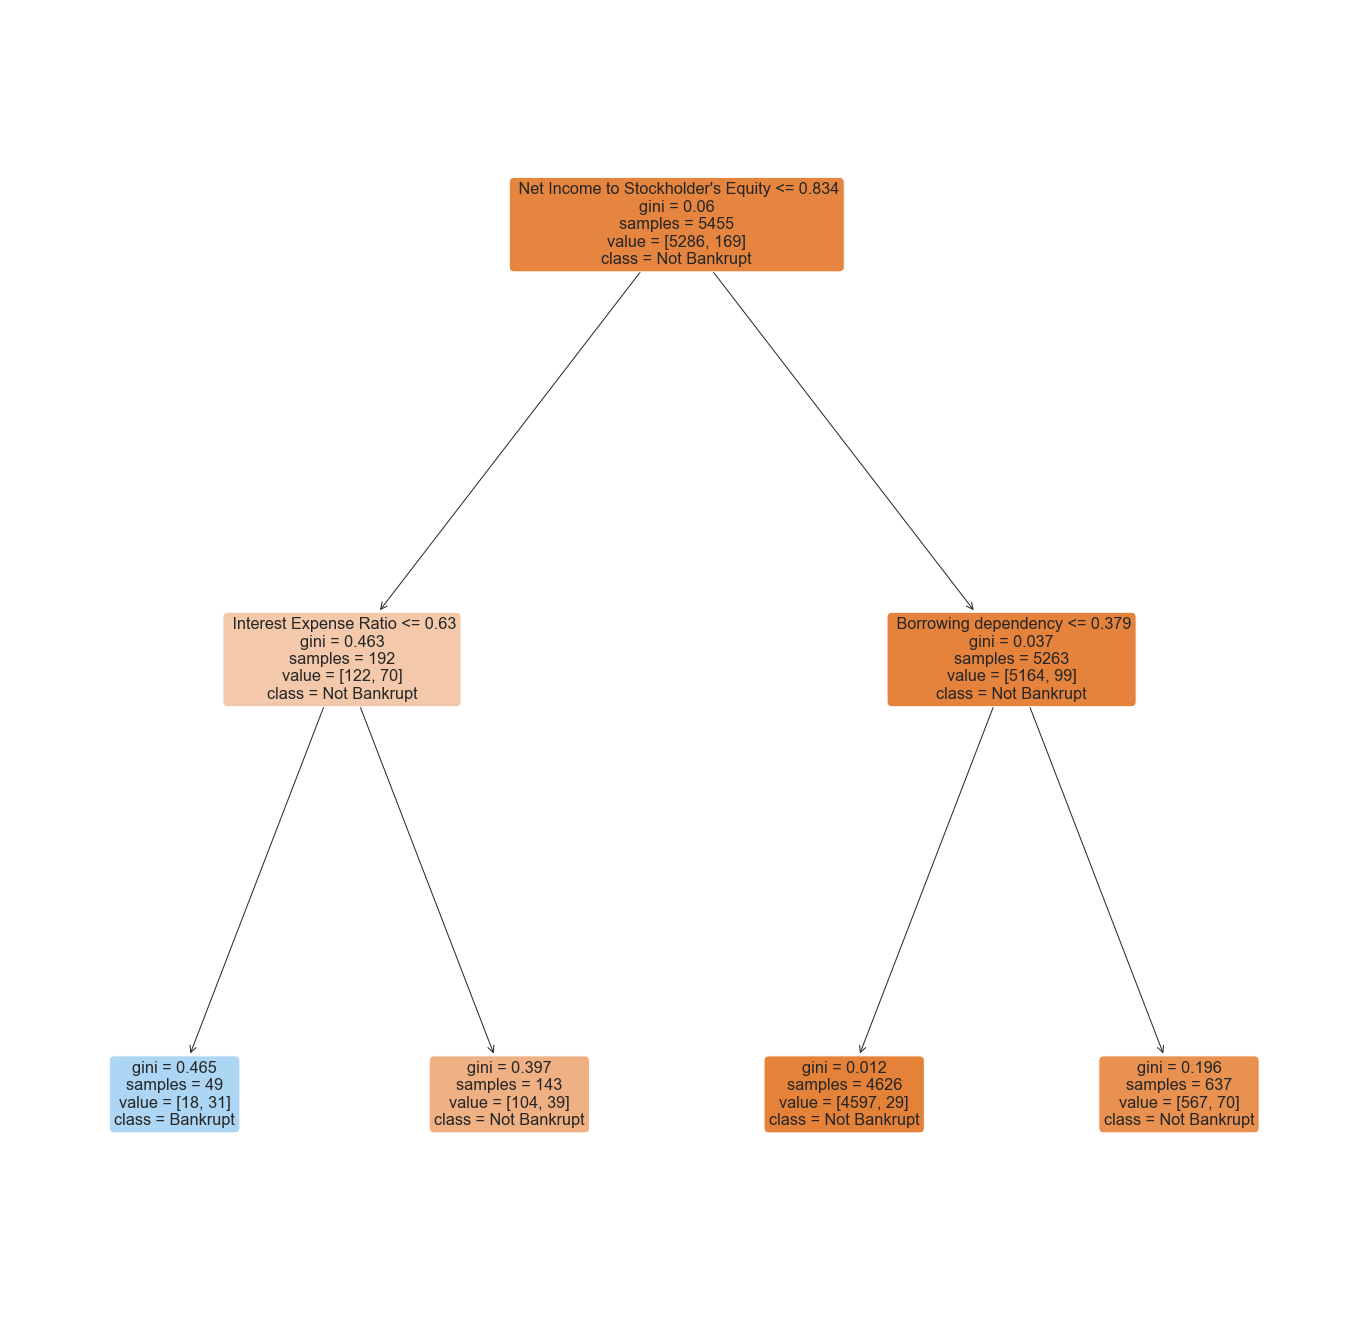

In [74]:
dectree = DecisionTreeClassifier(max_depth=2)
dectree.fit(X_train, y_train)

f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X.columns, 
          class_names=["Not Bankrupt","Bankrupt"])

[Text(611.8758620689655, 1174.1760000000002, ' Persistent EPS in the Last Four Seasons <= 0.181\ngini = 0.06\nsamples = 5455\nvalue = [5286, 169]\nclass = Not Bankrupt'),
 Text(253.98620689655172, 913.248, ' Net Income to Total Assets <= 0.609\ngini = 0.483\nsamples = 130\nvalue = [77, 53]\nclass = Not Bankrupt'),
 Text(92.35862068965517, 652.3200000000002, ' Per Share Net profit before tax (Yuan ¥) <= 0.126\ngini = 0.346\nsamples = 18\nvalue = [4, 14]\nclass = Bankrupt'),
 Text(46.179310344827584, 391.39200000000005, 'gini = 0.0\nsamples = 12\nvalue = [0, 12]\nclass = Bankrupt'),
 Text(138.53793103448277, 391.39200000000005, ' Persistent EPS in the Last Four Seasons <= 0.172\ngini = 0.444\nsamples = 6\nvalue = [4, 2]\nclass = Not Bankrupt'),
 Text(92.35862068965517, 130.46400000000017, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = Not Bankrupt'),
 Text(184.71724137931034, 130.46400000000017, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = Bankrupt'),
 Text(415.61379310344824, 65

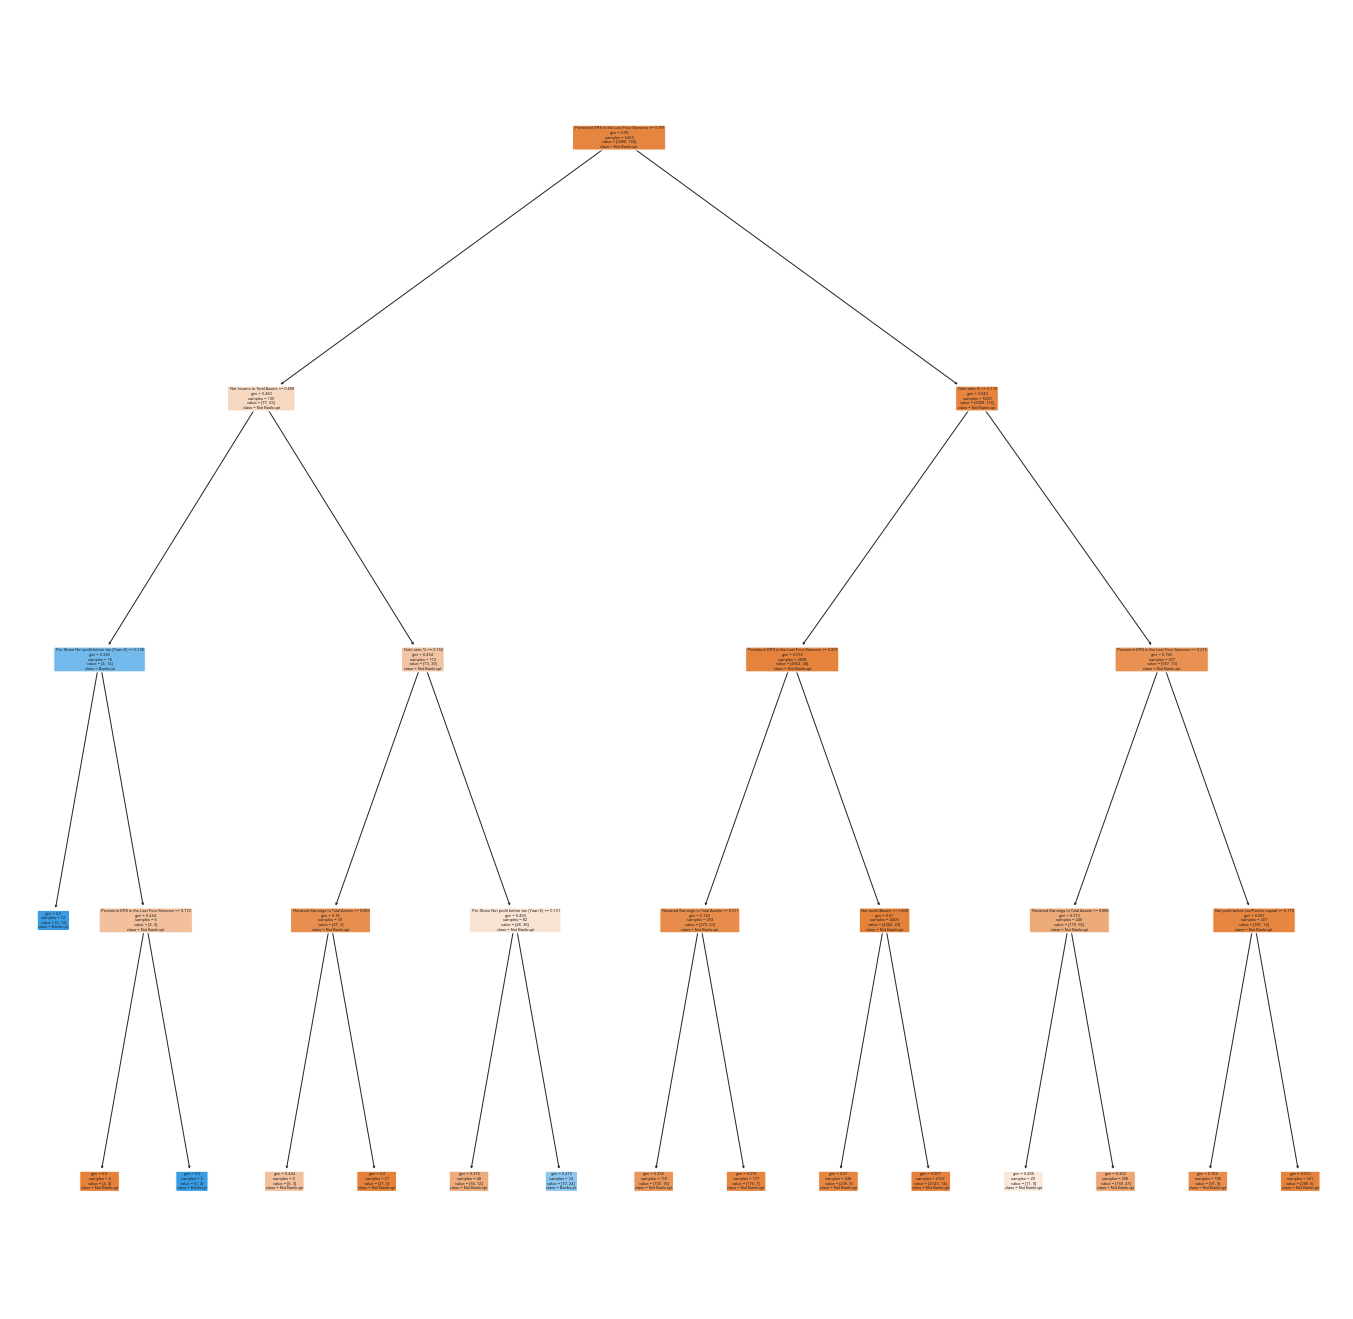

In [75]:
dectree_top10 = DecisionTreeClassifier(max_depth=4)
dectree_top10.fit(X_train_top10, y_train_top10)

f = plt.figure(figsize=(24,24))
plot_tree(dectree_top10, filled=True, rounded=True, 
          feature_names=df_top10.columns, 
          class_names=["Not Bankrupt","Bankrupt"])

### Seeing the accuracy of our Decision Tree Model

In [76]:
# Evaluate the accuracy of the model for all variables
y_pred = dectree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the model: {:.2f}%".format(accuracy*100))


# Evaluate the accuracy of the model for top 10 variables
y_pred_top10 = dectree_top10.predict(X_test_top10)

accuracy_top10 = accuracy_score(y_test_top10, y_pred_top10)
print("Accuracy of the model: {:.2f}%".format(accuracy_top10*100))


Accuracy of the model: 96.26%
Accuracy of the model: 96.63%


Let's run a for loop and see how the accuracy changes with the depth of the decision tree for both dataframes (all 95 variables and top 10 variables respectively)

In [92]:
# For top 95
for i in range(1,50):
    dectree = DecisionTreeClassifier(max_depth=i)
    dectree.fit(X_train, y_train)
    y_pred = dectree.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of the model for all variables for tree of depth {i}: {accuracy*100:.2f}%")
print("----------")

# For top 10
for i in range(1,50):
    dectree_top10 = DecisionTreeClassifier(max_depth=i)
    dectree_top10.fit(X_train_top10, y_train_top10)
    y_pred_top10 = dectree_top10.predict(X_test_top10)
    accuracy_top10 = accuracy_score(y_test_top10, y_pred_top10)
    print(f"Accuracy of the model for top 10 variables tree of depth {i}: {accuracy_top10*100:.2f}%")


Accuracy of the model for all variables for tree of depth 1: 96.26%
Accuracy of the model for all variables for tree of depth 2: 96.26%
Accuracy of the model for all variables for tree of depth 3: 96.41%
Accuracy of the model for all variables for tree of depth 4: 95.97%
Accuracy of the model for all variables for tree of depth 5: 95.75%
Accuracy of the model for all variables for tree of depth 6: 95.89%
Accuracy of the model for all variables for tree of depth 7: 95.75%
Accuracy of the model for all variables for tree of depth 8: 95.67%
Accuracy of the model for all variables for tree of depth 9: 95.31%
Accuracy of the model for all variables for tree of depth 10: 95.60%
Accuracy of the model for all variables for tree of depth 11: 95.09%
Accuracy of the model for all variables for tree of depth 12: 95.45%
Accuracy of the model for all variables for tree of depth 13: 95.01%
Accuracy of the model for all variables for tree of depth 14: 94.79%
Accuracy of the model for all variables for

83/83 [==============================] - 0s 1ms/step
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 7.53012048e-04 7.53012048e-04
 7.53012048e-04 7.53012048e-04 7.53012048e-04 7.53012048e-04
 7.53012048e-04 7.53012048e-04 7.53012048e-04 7.53012048e-04
 7.53012048e-04 7.53012048e-04 7.53012048e-04 7.53012048e-04
 7.53012048e-04 7.53012048e-04 7.53012048e-04 7.53012048e-04
 7.53012048e-04 7.53012048e-04 7.53012048e-04 7.53012048e-04
 7.53012048e-04 7.53012048e-04 7.53012048e-04 7.53012048e-04
 1.50602410e-03 1.50602410e-03 1.50602410e-03 1.50602410e-03
 1.50602410e-03 1.50602410e-03 1.50602410e-03 1.50602410e-03
 1.50602410e-03 1.50602410e-03 1.50602410e-03 1.50602410e-03
 1.50602410e-03 1.50602410e-03 2

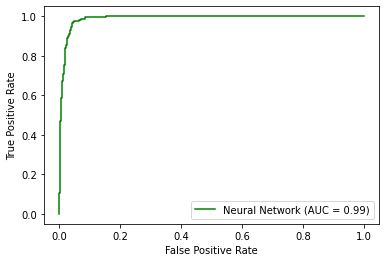

In [21]:


# predict probabilities with neural network model
nn_probs = model_upsample_all.predict(X_test_upsample)

# compare the predicted probabilities
from sklearn.metrics import roc_curve, auc


fpr_nn, tpr_nn, _ = roc_curve(y_test_upsample, nn_probs)





roc_auc_nn = auc(fpr_nn, tpr_nn)


plt.plot(fpr_nn, tpr_nn, color='green', label='Neural Network (AUC = %0.2f)' % roc_auc_nn)
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


In [30]:

# predict probabilities with neural network model
nn_probs = model_upsample_all.predict(X_test_upsample)

# calculate fpr and tpr for different thresholds
fpr_nn, tpr_nn, thresholds = roc_curve(y_test_upsample, nn_probs)

# calculate overall tpr and fpr by averaging across different thresholds
overall_tpr = np.mean(tpr_nn)
overall_fpr = np.mean(fpr_nn)
tnr_nn = 1 - overall_fpr
fnr_nn = 1 - overall_tpr


# calculate AUC
roc_auc_nn = auc(fpr_nn, tpr_nn)

# print results
print("Overall True Positive Rate:", overall_tpr)
print("Overall False Positive Rate:", overall_fpr)
print("True Negative Rate:", tnr_nn)
print("False Negative Rate:", fnr_nn)
print("AUC:", roc_auc_nn)

83/83 [==============================] - 0s 1ms/step
Overall True Positive Rate: 0.583924660769495
Overall False Positive Rate: 0.028977706601052096
True Negative Rate: 0.9710222933989479
False Negative Rate: 0.416075339230505
AUC: 0.9887122805245373


In [33]:
# set threshold
threshold = 0.5

# predict probabilities with neural network model
nn_probs = model_upsample_all.predict(X_test_upsample)

# convert probabilities to binary values
nn_preds = np.where(nn_probs >= threshold, 1, 0)


# create confusion matrix
cm_nn = confusion_matrix(y_test_upsample, nn_preds)

# calculate true positives (TP), false positives (FP), false negatives (FN), true negatives (TN)
tp_nn = cm_nn[1, 1]
fp_nn = cm_nn[0, 1]
fn_nn = cm_nn[1, 0]
tn_nn = cm_nn[0, 0]

# print results
print("True Positives:", tp_nn)
print("False Positives:", fp_nn)
print("False Negatives:", fn_nn)
print("True Negatives:", tn_nn)



83/83 [==============================] - 0s 1ms/step
True Positives: 1279
False Positives: 76
False Negatives: 33
True Negatives: 1252


<AxesSubplot:>

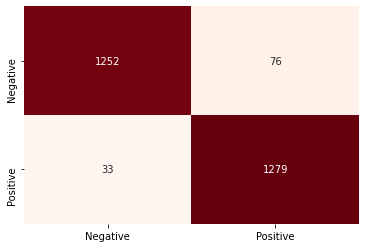

In [37]:

# predict labels with neural network model
nn_labels = (nn_probs >= 0.5).astype(int)

# create confusion matrix
cm_nn = confusion_matrix(y_test_upsample, nn_labels)

# create heatmap of confusion matrix
sns.heatmap(cm_nn, annot=True, cmap="Reds", fmt="d", cbar=False, 
            xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
